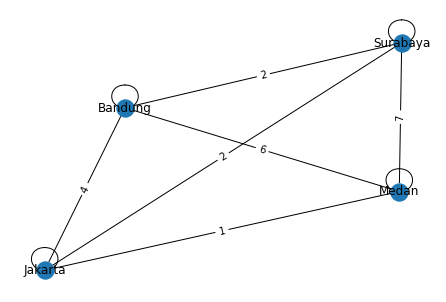

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
 
def floyd_warshall(graph):
 
    # Inisialisasi jarak antar setiap pasangan node
    dist = list(map(lambda i : list(map(lambda j : j, i)), graph))
 
    # Jalankan algoritma Floyd-Warshall
    for k in range(len(graph)):
        for i in range(len(graph)):
            for j in range(len(graph)):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
 
    return dist
 
# Daftar kota
city = ["Jakarta", "Bandung", "Surabaya", "Medan"]
 
# Matriks jarak antar kota
graph = [[0, 5, 9, 1], [5, 0, 2, 8], [9, 2, 2, 1], [1, 8, 7, 0]]
 
# Jalankan algoritma Floyd-Warshall
result = floyd_warshall(graph)

# Buat objek graph
G = nx.Graph()
 
# Tambahkan node ke dalam graph
for i in range(len(city)):
    G.add_node(city[i])
 
# Tambahkan edge ke dalam graph
for i in range(len(city)):
    for j in range(len(city)):
        if result[i][j] != float('inf'):
            G.add_edge(city[i], city[j], weight=result[i][j])
 
# Visualisasi graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

